Homework 5 - Farruhjon Turgunov

## Question 1:

#### Part 1:

Let the vectors $\vec{e_s} = [S_x, S_y]$ and $\vec{e_t} = [T_x, T_y]$ be orthonormal basis vectors for systems $[S, T]$.

Let the vectors $\vec{e_u} = [U_x, U_y]$ and $\vec{e_v} = [V_x, V_y]$ be unit vectors for systems $[U, V]$.

Let the vector $\vec{q} = [q_x, q_y]$.

Since vectors $\vec{e_s}$ and $\vec{e_t}$ are orthonormal, the coordinates would be dot-product projections.

Thus, the vectors $\vec{q_s} = qe_s = q_x*S_x + q_y*S_y$ and $\vec{q_t} = qe_s = q_x*T_x + q_y*T_y$.

So in the space of $[S,T]$, $\vec{q} = qe_s + qe_t$ or $\vec{q} = [qe_s, qe_s]$

#### Part 2:

We are working with a non-orthogonal unit space, we'll have to use $\vec{q} = a\,\vec{e_u} + b\,\vec{e_v}$.

$\rightarrow \begin{pmatrix}U_x & V_x \\ U_y & V_y \end{pmatrix} \begin{pmatrix} a \\ b \end{pmatrix} = \begin{pmatrix} q_x \\ q_y \end{pmatrix}$

Now we simply multiply with $\begin{pmatrix}U_x & V_x \\ U_y & V_y \end{pmatrix}^{-1}$ onto the left of both sides of the equality to be left with:

$\begin{pmatrix} a \\ b \end{pmatrix} = \begin{pmatrix}U_x & V_x \\ U_y & V_y \end{pmatrix}^{-1} \begin{pmatrix} q_x \\ q_y \end{pmatrix}$

If we were to go further and compute for the values of a and b:

$\begin{pmatrix} a \\ b \end{pmatrix} = \frac{1}{U_xV_y - V_xU_y} \begin{pmatrix} V_yq_x - V_xq_y \\ -U_yq_x + U_xq_y \end{pmatrix}$

$a = \frac{V_yq_x - V_xq_y}{U_xV_y - V_xU_y}$ and $b = \frac{-U_yq_x + U_xq_y}{U_xV_y - V_xU_y}$


#### Part 3:

There are a few reasons why orthogonal basis are easier to handle, one of which is the fact that computing them are relatively simple. Acquisition of coordinates can be easily obtained through dot product. The inverse of a matrix E is the same as its transpose: $E^{-1} = E^{T}$, while with non-orthogonal matrices, the determinants can be a value of $sin(\theta)$, which would make the inverse calculation not so simple. Orthogonal components ensure uncorrelated and independent dimensions in PCA.

## Question 2:

In [31]:
import numpy as np

class MyPCA:
    def __init__(self):
        self.means_ = None
        self.cov_ = None
        self.eigvals_ = None
        self.eigvecs_ = None
        self.scores_ = None
        self.loadings_ = None
        self.variance_ = None
        self.percent_variance_ = None

    def fit(self, X):
        """
        Fit the PCA model to data X.
        X shape: (n_samples, n_features)
        """

        # (1) Mean-center the data
        self.means_ = np.mean(X, axis=0)
        X_centered = X - self.means_

        # (2) Covariance matrix (variables as columns)
        # rowvar=False means each column is a variable
        self.cov_ = np.cov(X_centered, rowvar=False)

        # (3) Eigen-decomposition
        eigvals, eigvecs = np.linalg.eig(self.cov_)

        # Sort eigenvalues and eigenvectors in descending order
        idx = np.argsort(eigvals)[::-1]
        self.eigvals_ = eigvals[idx].real      # <--- Take only the real part
        self.eigvecs_ = eigvecs[:, idx].real   # <--- Take only the real part

        # (4) Project data onto principal components
        self.scores_ = X_centered @ self.eigvecs_

        # (5) Variance explained
        total_var = np.sum(self.eigvals_)
        self.variance_ = self.eigvals_
        self.percent_variance_ = self.eigvals_ / total_var * 100

        # Loadings = eigenvectors
        self.loadings_ = self.eigvecs_

        return self

    def transform(self, X):
        """
        Project new data using the fitted PCA model.
        """
        X_centered = X - self.means_
        return X_centered @ self.loadings_

    def fit_transform(self, X):
        """
        Convenience method: fit PCA and return scores.
        """
        self.fit(X)
        return self.scores_


## Question 3:

#### Part 1:

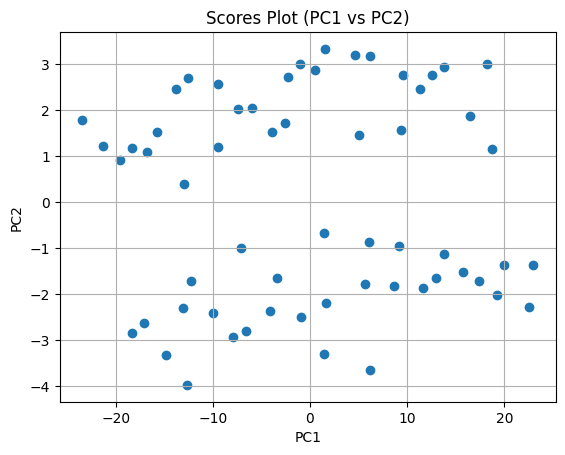

Eigenvalues (variances): [161.04072383   5.12528389]
Percent variance explained: [96.91556417  3.08443583]


In [32]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./Homework_2_dataset_prob3.csv')
X = df.values  # rows=samples, columns=variables

pca = MyPCA()
scores = pca.fit_transform(X)


plt.scatter(scores[:, 0], scores[:, 1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Scores Plot (PC1 vs PC2)")
plt.grid(True)
plt.show()


print("Eigenvalues (variances):", pca.variance_)
print("Percent variance explained:", pca.percent_variance_)

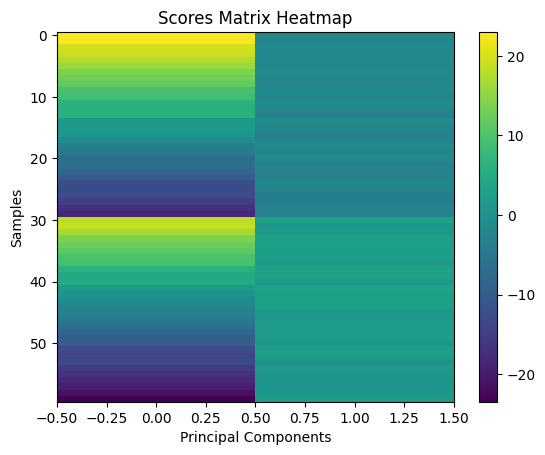

In [33]:
plt.imshow(scores, aspect='auto')
plt.xlabel("Principal Components")
plt.ylabel("Samples")
plt.title("Scores Matrix Heatmap")
plt.colorbar()
plt.show()

#### Part 2:

Do you see a cear separation of the raw data?
    
    We can see clear separation from the raw data from the scores dot plot. Additionally, looking at the heat map, we can see that PC1 has the clear separation while PC2 does not.

Can you still separate them after you project your raw data onto PC1?

    Yes, very much so. We can see that PC1 holds 96.9% of the varience, essentially containing the entire data.

What message can you get from this observation?

    The data is almost entirely 1 dimentional and that there is a near perfect linear relationship between the two variables from the raw data.

What is the varience of the projections on PC1 and PC2.

    $[PC1, PC2] = [161.04072383, 5.12528389]$
    $[PC1, PC2] = [96.91556417, 3.08443583]$

What is the relationship between these variances and eigenvalues of your covariance matrix?

    The relationship we see for PC1's variance is that it is equal to the first eigenvalue.
    The relationship we see for PC2's variance is that it is equal to the second eigenvalue.

## Question 4:

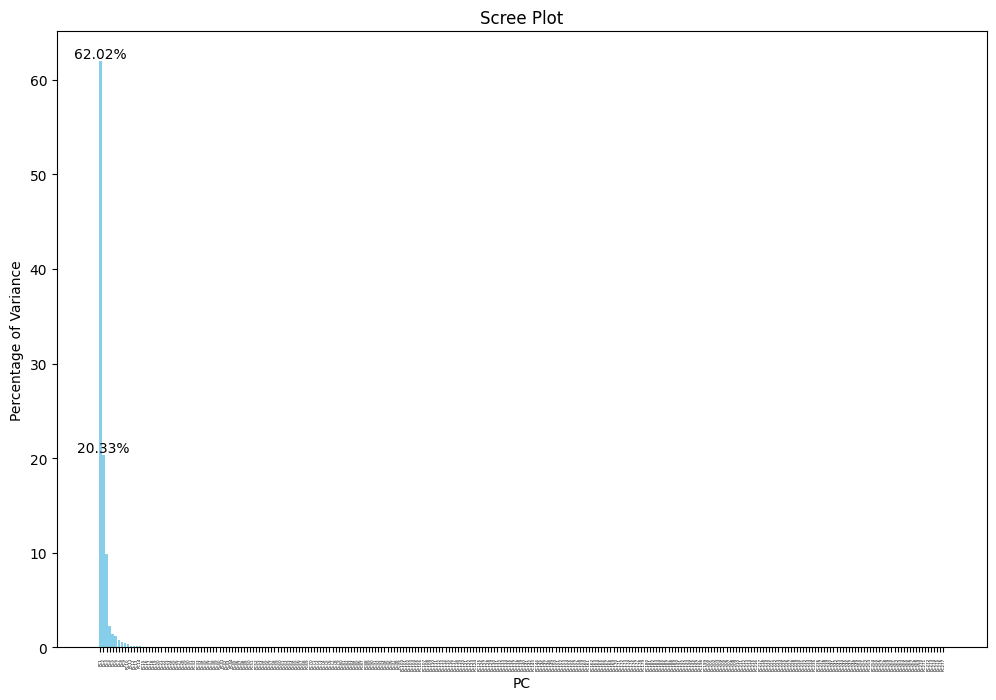

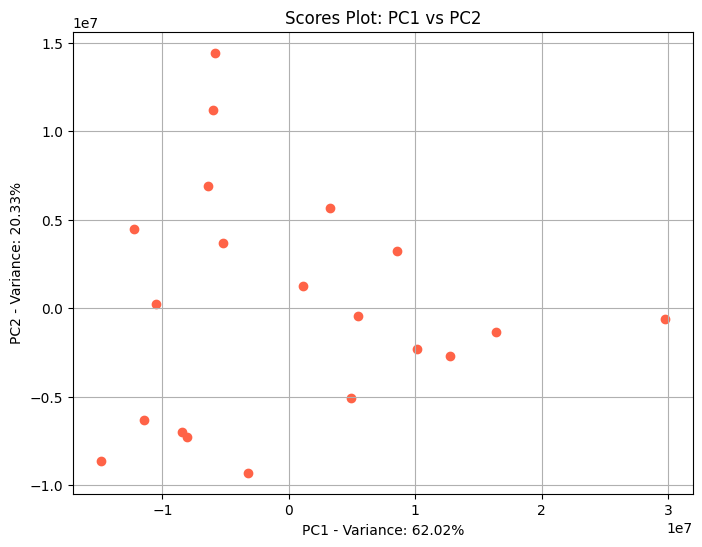

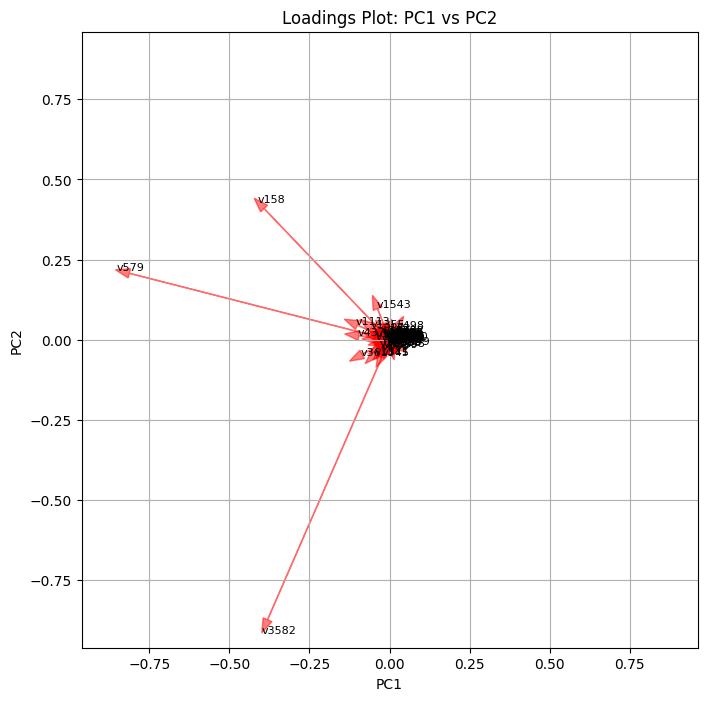

In [55]:
# --- Load data and transpose ---
df = pd.read_csv('./Homework_2_dataset_prob4.csv', index_col=0)
X = df.values.T  # Transpose: rows=samples, columns=variables

# --- Run PCA ---
pca = MyPCA()
scores = pca.fit_transform(X)
loadings = pca.loadings_
evr = pca.percent_variance_

pc1_var = evr[0]
pc2_var = evr[1]

# --- Scree Plot ---
pc_labels = [f'PC{i+1}' for i in range(len(evr))]

plt.figure(figsize=(12, 8))
plt.bar(pc_labels, evr, color='skyblue')
plt.text(pc_labels[0], pc1_var, f'{pc1_var:.2f}%', ha='center', va='bottom', fontsize=10)
plt.text(pc_labels[1], pc2_var, f'{pc2_var:.2f}%', ha='center', va='bottom', fontsize=10)
plt.title('Scree Plot')
plt.xlabel('PC')
plt.ylabel('Percentage of Variance')
plt.xticks(rotation=90)
plt.xticks(fontsize=3)
plt.show()

# --- Scores Plot (PC1 vs PC2) ---
plt.figure(figsize=(8, 6))
plt.scatter(scores[:, 0], scores[:, 1], color='tomato')
plt.title('Scores Plot: PC1 vs PC2')
plt.xlabel(f'PC1 - Variance: {pc1_var:.2f}%')
plt.ylabel(f'PC2 - Variance: {pc2_var:.2f}%')
plt.grid(True)
plt.show()

# --- Loadings Plot (PC1 vs PC2) ---
n_variables = X.shape[1]

plt.figure(figsize=(8, 8))
for i in range(n_variables):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], color='r', alpha=0.5, head_width=0.03)
    plt.text(loadings[i, 0] * 1.05, loadings[i, 1] * 1.05, df.index[i], color='k', fontsize=8)

max_abs_val = np.max(np.abs(loadings[:, :2])) * 1.1
plt.xlim(-max_abs_val, max_abs_val)
plt.ylim(-max_abs_val, max_abs_val)
plt.title('Loadings Plot: PC1 vs PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [46]:
print(f"PC1 Variance: {pc1_var:.2f}%")
print(f"PC2 Variance: {pc2_var:.2f}%")

PC1 Variance: 62.02%
PC2 Variance: 20.33%
